In [71]:
# Libraries import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [72]:
data = pd.read_csv('../data/model-cleaned-players22.csv')

In [73]:
non_numeric_columns = ['club_name', 'league_name', 'nationality_name']
# Perform one-hot encoding on non-numeric columns
encoded_data = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

# Create a copy of this dataset. The new copy will be standardized
# so we can compare the performance of both the standardized and non-standardized datasets
standardized_data = encoded_data.copy()
standardized_data['value_eur'] = np.log(standardized_data['value_eur'])

y = encoded_data['value_eur']
x = encoded_data.drop(columns= 'value_eur')

sdz_y = standardized_data['value_eur']
sdz_x = standardized_data.drop(columns= 'value_eur')

sdz_y

0        18.172219
1        18.598827
2        17.622173
3        18.675323
4        18.647816
           ...    
17036    11.156251
17037    11.608236
17038    11.512925
17039    11.608236
17040    11.608236
Name: value_eur, Length: 17041, dtype: float64

In [74]:
x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.3, random_state=0
)

x_train

,position,overall,potential,wage_eur,age,height_cm,weight_kg,club_contract_valid_until,preferred_foot,weak_foot,...,nationality_name_Uganda,nationality_name_Ukraine,nationality_name_United Arab Emirates,nationality_name_United States,nationality_name_Uruguay,nationality_name_Uzbekistan,nationality_name_Venezuela,nationality_name_Wales,nationality_name_Zambia,nationality_name_Zimbabwe
12146,0,62,65,3000.0,26,188,75,2023.0,1,2,...,0,0,0,0,0,0,0,0,0,0
2954,2,72,72,6000.0,28,170,69,2025.0,1,3,...,0,0,0,0,0,0,0,0,0,0
11796,2,63,78,2000.0,20,180,75,2023.0,1,3,...,0,0,0,0,0,0,0,0,0,0
12098,1,62,62,3000.0,31,170,75,2023.0,1,3,...,0,0,0,0,0,0,0,0,0,0
15618,0,56,71,2000.0,21,182,83,2022.0,1,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,1,65,68,9000.0,25,188,80,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
13123,0,61,69,2000.0,22,180,75,2022.0,1,3,...,0,0,0,0,0,0,0,0,0,0
9845,1,65,80,2000.0,21,174,61,2022.0,1,2,...,0,0,0,0,0,0,0,0,0,0
10799,1,64,72,500.0,23,180,73,2021.0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Standardize the train data
sd_x_train, sd_x_test, sdz_y_train, sdz_y_test = train_test_split(
   sdz_x, sdz_y, test_size=0.3, random_state=0
)

scaler = StandardScaler()
sdz_x_train = scaler.fit_transform(sd_x_train)
sdz_x_test = scaler.fit_transform(sd_x_test)

sdz_x_train

array([[-1.18015115, -0.58731107, -1.03542612, ..., -0.08370888,
        -0.02423219, -0.02590639],
       [ 1.08592144,  0.8889494 ,  0.12182951, ..., -0.08370888,
        -0.02423219, -0.02590639],
       [ 1.08592144, -0.43968502,  1.11376291, ..., -0.08370888,
        -0.02423219, -0.02590639],
       ...,
       [-0.04711486, -0.14443293,  1.44440738, ..., -0.08370888,
        -0.02423219, -0.02590639],
       [-0.04711486, -0.29205897,  0.12182951, ..., -0.08370888,
        -0.02423219, -0.02590639],
       [-1.18015115,  1.03657545,  1.60972961, ..., -0.08370888,
        -0.02423219, -0.02590639]])

In [76]:
lr = LinearRegression()
lr.fit(x_train, y_train)
 
c = lr.intercept_
c

7644854939193.64

In [77]:
sdz_lr = LinearRegression()
sdz_lr.fit(sdz_x_train, sdz_y_train)
 
sdz_c = lr.intercept_
sdz_c

7644854939193.64

In [78]:
m = lr.coef_
m

array([ 1.41431151e+05,  2.93379795e+05,  4.92661561e+04,  2.84319367e+02,
       -3.23917120e+05,  3.26194679e+04, -1.45087715e+04,  2.83784135e+05,
       -1.24439939e+05,  4.53100359e+04, -4.85549689e+04,  2.24378226e+06,
        2.37381881e+05,  1.18342218e+05, -1.60819915e+05, -1.71742776e+05,
        1.62113059e+05,  2.41469172e+04, -2.87311905e+04,  2.89728532e+04,
        7.98742046e+04, -2.12421990e+04,  4.81269282e+04,  1.35856519e+04,
       -8.42843958e+04,  9.18484093e+03,  1.08360979e+04,  2.16267592e+04,
       -8.17951934e+04, -5.14092335e+04, -6.14616676e+04, -2.74283188e+04,
        1.96120679e+04,  1.43634918e+04,  2.56826770e+04, -4.31128863e+03,
        1.36494080e+04,  2.90275982e+04,  2.57479520e+04,  4.58233208e+03,
       -1.39853353e+04,  9.58754963e+03,  4.70554507e+04,  4.80949174e+03,
       -1.06786029e+04,  1.84586785e+03, -1.37857922e+04,  3.28705819e+02,
       -4.64702657e+12, -4.76073765e+12, -4.64702577e+12,  6.65701351e+05,
       -4.64702590e+12, -

In [79]:
sdz_m = sdz_lr.coef_
sdz_m

array([ 2.15523755e-02,  1.18641349e+00,  5.24782027e-02,  8.29823307e-02,
       -4.61701644e-01,  7.59690974e-03,  7.83176247e-03,  3.38430579e-03,
       -1.18596809e-03, -1.94711896e-03,  1.20679186e-02,  2.88129891e-02,
       -1.49380305e-03, -6.09568621e-02, -1.22979458e-02, -1.40257370e-02,
       -6.08192377e-02,  1.70334387e-01,  7.19064347e-02, -2.56991307e-03,
        1.70197284e-02, -6.53941629e-03,  9.94800780e-03,  1.37940232e-02,
        4.05066840e-02, -1.14848935e-02,  9.88208954e-03, -3.66506238e-03,
        9.22909864e-03,  4.23720479e-02,  5.09223071e-02, -2.89527232e-03,
        1.92713579e-02,  7.87651828e-03, -2.72603915e-03, -4.06049244e-03,
       -5.33036634e-03, -4.91831439e-02, -8.51575785e-03, -2.03699581e-02,
       -3.90939423e-02,  9.93148071e-03,  5.58714291e-03, -2.77459702e-03,
       -1.90884638e-03, -5.65856377e-02, -5.43681474e-02, -3.21795065e-02,
        1.41888564e+10,  6.16747062e+10,  1.17395552e+10,  7.33809102e-04,
        1.17395552e+10,  

In [80]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([  419800.96777344,  4796284.52441406,  2419359.9296875 , ...,
        1527641.57226562,  3374014.72167969, 14012123.93359375])

In [81]:
sdz_y_pred_train = sdz_lr.predict(sdz_x_train)
sdz_y_pred_train

array([13.03296266, 14.58612455, 14.03103233, ..., 14.23432533,
       13.65192151, 15.68793263])

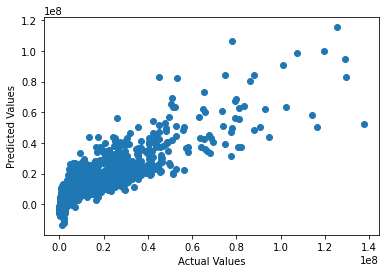

In [82]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

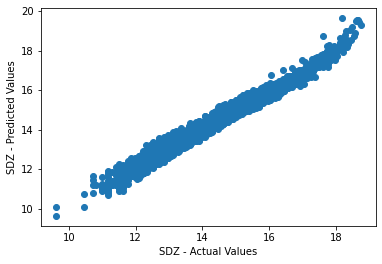

In [83]:
plt.scatter(sdz_y_train, sdz_y_pred_train)
plt.xlabel('SDZ - Actual Values')
plt.ylabel('SDZ - Predicted Values')
plt.show()

In [84]:
r2_score(y_train, y_pred_train)

0.793015865931115

In [85]:
r2_score(sdz_y_train, sdz_y_pred_train)

0.9793025076512953

In [86]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([ 396478.68652344,  193689.10546875, 1016361.91015625, ...,
        342361.6171875 , 1730110.61328125, -856407.11132812])

In [87]:
sdz_y_pred_test = sdz_lr.predict(sdz_x_test)
sdz_y_pred_test

array([-5.22865145e+10,  2.07826231e+10, -5.10692872e+10, ...,
        2.53181067e+11, -6.43940448e+09, -1.06041778e+10])

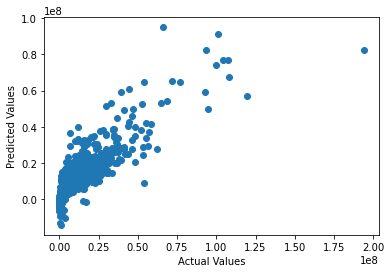

In [88]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

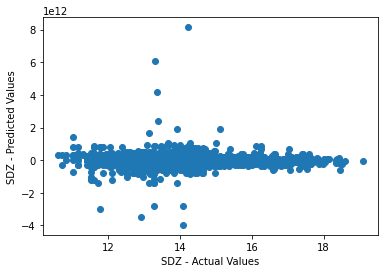

In [89]:
plt.scatter(sdz_y_test, sdz_y_pred_test)
plt.xlabel('SDZ - Actual Values')
plt.ylabel('SDZ - Predicted Values')
plt.show()

In [90]:
r2_score(y_test, y_pred_test)

0.7675777743202911

In [91]:
r2_score(sdz_y_test, sdz_y_pred_test)

-5.3242400725023634e+22